### Data 

In [4]:
import pandas as pd 

### Delays 
delays = pd.read_csv('/Users/rileysallander/Desktop/ML/ML554/Data/MTA_LIRR_Delays__Beginning_2010.csv')

delays.rename(columns={'Service Date': 'Date'}, inplace=True)

delays['Date'] = pd.to_datetime(delays['Date'], format='%m/%d/%Y')

### Filter rows between 2015 and 2019
delays = delays[(delays['Date'].dt.year >= 2016) & (delays['Date'].dt.year <= 2019)]

delays['Minutes Late'] = delays['Minutes Late'].fillna(0)

print(delays)



             Date Train  ... Minutes Late             Delay Category
99791  2016-01-01  6003  ...          6.0                     Police
99792  2016-01-01  6601  ...          9.0                  Customers
99793  2016-01-01  6602  ...         31.0             Special Events
99794  2016-01-01  6690  ...         62.0             Special Events
99795  2016-01-01  6701  ...         11.0             Special Events
...           ...   ...  ...          ...                        ...
181626 2019-12-31   905  ...          8.0  Engineering (Unscheduled)
181627 2019-12-31  1003  ...          7.0                  Customers
181628 2019-12-31   727  ...         10.0                     Police
181629 2019-12-31   909  ...         12.0                     Police
181630 2019-12-31  2817  ...          7.0  Engineering (Unscheduled)

[81840 rows x 11 columns]
             Date Train  ... Minutes Late             Delay Category
99791  2016-01-01  6003  ...          6.0                     Police
99792  

<positron-console-cell-4>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


In [5]:

# Weather data
weather = pd.read_csv("/Users/rileysallander/Desktop/ML/ML554/Data/NYC Weather data.csv")
weather = weather.rename(columns={
    'STATION': 'Station',
    'NAME': 'Name',
    'DATE': 'Date',
    'AWND': 'Average Wind Speed',
    'PRCP': 'Precipitation',
    'SNOW': 'Snow',
    'SNWD': 'Snow Depth',
    'TMAX': 'Max Temp',
    'TMIN': 'Min Temp',
})
columns_of_interest = ['Station', 'Name', 'Date', 'Average Wind Speed', 'Precipitation', 'Snow', 'Snow Depth', 'Max Temp', 'Min Temp']
weather_fil = weather[columns_of_interest]
weather_fil['Date'] = pd.to_datetime(weather_fil['Date'], errors='coerce')

numeric_cols = ['Average Wind Speed', 'Precipitation', 'Snow', 'Snow Depth', 'Max Temp', 'Min Temp']
weather_fil[numeric_cols] = weather_fil[numeric_cols].apply(pd.to_numeric, errors='coerce')

weather_fil = weather_fil.dropna(subset=['Date'])

weather_fil = weather_fil.reset_index(drop=True)

weather_fil['Year'] = weather_fil['Date'].dt.year
#adding column month_year and year
weather_fil['Month_Year'] = weather_fil['Date'].dt.to_period('M').astype(str)
weather_fil

<positron-console-cell-5>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<positron-console-cell-5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Station,Name,Date,Average Wind Speed,Precipitation,Snow,Snow Depth,Max Temp,Min Temp,Year,Month_Year
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-01-01,7.61,0.00,0.0,0.0,42,34,2016,2016-01
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-01-02,6.71,0.00,0.0,0.0,40,32,2016,2016-01
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-01-03,7.83,0.00,0.0,0.0,45,35,2016,2016-01
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-01-04,8.50,0.00,0.0,0.0,36,14,2016,2016-01
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-01-05,5.14,0.00,0.0,0.0,29,11,2016,2016-01
...,...,...,...,...,...,...,...,...,...,...,...
2917,USW00014732,"LAGUARDIA AIRPORT, NY US",2019-12-27,8.95,0.00,0.0,0.0,54,42,2019,2019-12
2918,USW00014732,"LAGUARDIA AIRPORT, NY US",2019-12-28,8.28,0.00,0.0,0.0,50,44,2019,2019-12
2919,USW00014732,"LAGUARDIA AIRPORT, NY US",2019-12-29,8.05,0.29,0.0,0.0,44,38,2019,2019-12
2920,USW00014732,"LAGUARDIA AIRPORT, NY US",2019-12-30,17.90,0.49,0.0,0.0,43,38,2019,2019-12


In [6]:
# Perform an inner join on the 'date' column
weather_delay = pd.merge(delays, weather_fil, on='Date', how='inner')

weather_delay.dropna()



,Date,Train,Branch,Depart Station,Depart Time,Arrive Station,Arrive Time,Period,Status,Minutes Late,Delay Category,Station,Name,Average Wind Speed,Precipitation,Snow,Snow Depth,Max Temp,Min Temp,Year,Month_Year
0,2016-01-01,6003,Babylon,Babylon,01/01/2016 01:23:00 AM,NY Penn Station,01/01/2016 02:46:00 AM,Off-peak,Late,6.0,Police,USW00094728,"NY CITY CENTRAL PARK, NY US",7.61,0.00,0.0,0.0,42,34,2016,2016-01
1,2016-01-01,6003,Babylon,Babylon,01/01/2016 01:23:00 AM,NY Penn Station,01/01/2016 02:46:00 AM,Off-peak,Late,6.0,Police,USW00014732,"LAGUARDIA AIRPORT, NY US",13.42,0.00,0.0,0.0,43,36,2016,2016-01
2,2016-01-01,6601,Port Jefferson,Port Jefferson,01/01/2016 04:44:00 AM,Jamaica,01/01/2016 06:12:00 AM,Off-peak,Late,9.0,Customers,USW00094728,"NY CITY CENTRAL PARK, NY US",7.61,0.00,0.0,0.0,42,34,2016,2016-01
3,2016-01-01,6601,Port Jefferson,Port Jefferson,01/01/2016 04:44:00 AM,Jamaica,01/01/2016 06:12:00 AM,Off-peak,Late,9.0,Customers,USW00014732,"LAGUARDIA AIRPORT, NY US",13.42,0.00,0.0,0.0,43,36,2016,2016-01
4,2016-01-01,6602,Port Jefferson,Jamaica,01/01/2016 02:10:00 AM,Port Jefferson,01/01/2016 03:36:00 AM,Off-peak,Late,31.0,Special Events,USW00094728,"NY CITY CENTRAL PARK, NY US",7.61,0.00,0.0,0.0,42,34,2016,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163675,2019-12-31,727,Hempstead,Hempstead,12/31/2019 08:45:00 AM,Atlantic Terminal,12/31/2019 09:34:00 AM,AM Peak,Late,10.0,Police,USW00014732,"LAGUARDIA AIRPORT, NY US",9.40,0.01,0.0,0.0,46,38,2019,2019-12
163676,2019-12-31,909,West Hempstead,West Hempstead,12/31/2019 08:28:00 AM,Atlantic Terminal,12/31/2019 09:18:00 AM,AM Peak,Late,12.0,Police,USW00094728,"NY CITY CENTRAL PARK, NY US",5.14,0.02,0.0,0.0,45,36,2019,2019-12
163677,2019-12-31,909,West Hempstead,West Hempstead,12/31/2019 08:28:00 AM,Atlantic Terminal,12/31/2019 09:18:00 AM,AM Peak,Late,12.0,Police,USW00014732,"LAGUARDIA AIRPORT, NY US",9.40,0.01,0.0,0.0,46,38,2019,2019-12
163678,2019-12-31,2817,Far Rockaway,Far Rockaway,12/31/2019 07:18:00 AM,Atlantic Terminal,12/31/2019 08:11:00 AM,AM Peak,Late,7.0,Engineering (Unscheduled),USW00094728,"NY CITY CENTRAL PARK, NY US",5.14,0.02,0.0,0.0,45,36,2019,2019-12


### Data Manip + libraries


In [8]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, make_scorer, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import label_binarize


# Step 1: Load your data
# Assuming your data is in a DataFrame named `weather_delay`
# Select features and target
X = weather_delay.drop(columns=['Status', 'Date','Train','Depart Station', 'Depart Time', 'Arrive Station', 'Minutes Late', 'Station', 'Name','Year','Month_Year'])  # Drop target and non-predictive columns
y = weather_delay['Status']

# Step 2: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Step 2.1: Clean up numerical columns (handle mixed types)
for col in numerical_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Coerce invalid values to NaN

# Step 2.2: Ensure all categorical columns are strings
for col in categorical_cols:
    X[col] = X[col].astype(str)  # Convert all categorical values to strings

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

 

### KNN (It takes like 10 mins to run this beware)

In [9]:
# Step 4: Define transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine both transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Step 5: Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Step 6: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
print(classification_report(y_test, y_pred))

# Get the predicted probabilities for each class
y_prob = pipeline.predict_proba(X_test)

# Compute the ROC AUC score for multi-class (using one-vs-rest strategy)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

print("ROC AUC Score:", roc_auc)




                precision    recall  f1-score   support

     Cancelled       0.52      0.36      0.43      1900
          Late       0.94      0.98      0.96     29735
Partial Cancel       0.58      0.24      0.34      1101

      accuracy                           0.92     32736
     macro avg       0.68      0.53      0.58     32736
  weighted avg       0.90      0.92      0.91     32736

                precision    recall  f1-score   support

     Cancelled       0.52      0.36      0.43      1900
          Late       0.94      0.98      0.96     29735
Partial Cancel       0.58      0.24      0.34      1101

      accuracy                           0.92     32736
     macro avg       0.68      0.53      0.58     32736
  weighted avg       0.90      0.92      0.91     32736



ROC AUC Score: 0.8767314456522448
ROC AUC Score: 0.8767314456522448


### Decision Tree (non cross validated)

In [10]:
## decision tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Step 1: Define transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine both transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Step 2: Define the full pipeline with Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # Use Decision Tree Classifier
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))



                precision    recall  f1-score   support

     Cancelled       0.88      0.76      0.81      1900
          Late       0.98      0.99      0.98     29735
Partial Cancel       0.91      0.71      0.80      1101

      accuracy                           0.97     32736
     macro avg       0.92      0.82      0.87     32736
  weighted avg       0.97      0.97      0.97     32736

                precision    recall  f1-score   support

     Cancelled       0.88      0.76      0.81      1900
          Late       0.98      0.99      0.98     29735
Partial Cancel       0.91      0.71      0.80      1101

      accuracy                           0.97     32736
     macro avg       0.92      0.82      0.87     32736
  weighted avg       0.97      0.97      0.97     32736



### The first few splits of the tree 

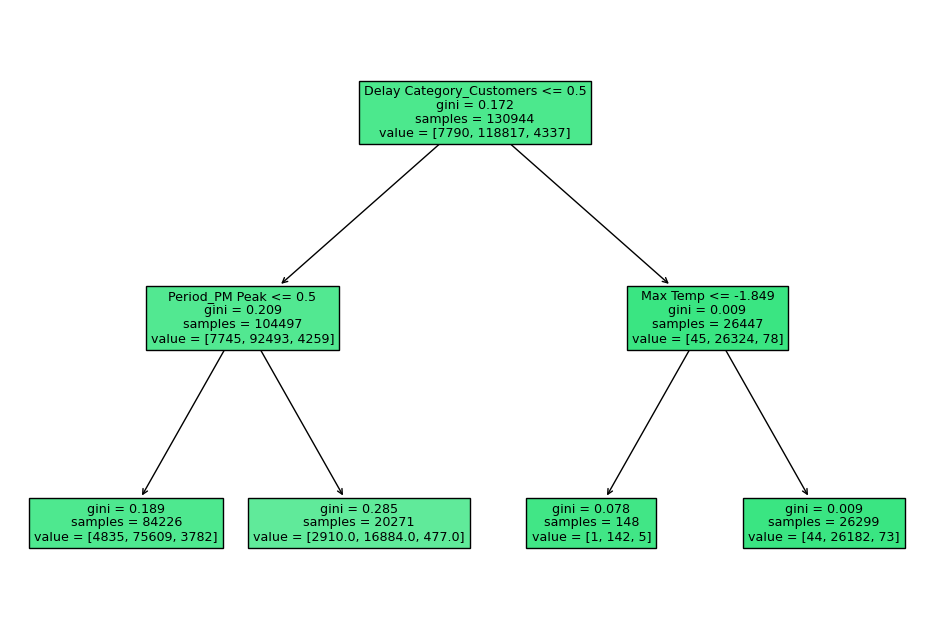

In [64]:


# Define classifier with constraints on depth
classifier = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_split=5, min_samples_leaf=4)

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get feature names after transformation
preprocessed_data = preprocessor.fit_transform(X_train)
numerical_feature_names = numerical_cols
categorical_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(pipeline.named_steps['classifier'], filled=True, feature_names=all_feature_names)
plt.show()


### cross validated tree (also takes long but not as bad as knn)

In [53]:

# Step 1: Define transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine both transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Step 2: Define the full pipeline with Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # Use Decision Tree Classifier
])

# Step 3: Apply cross-validation for ROC AUC (One-vs-Rest)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score with the ROC AUC metric for multi-class
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc_ovr')  # One-vs-Rest ROC AUC

# Print the results of cross-validation
print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean cross-validation ROC AUC score: {cv_scores.mean()}")


Cross-validation ROC AUC scores: [0.83216895 0.84386542 0.83636404 0.85770719 0.83679598]
Mean cross-validation ROC AUC score: 0.8413803183713527
Cross-validation ROC AUC scores: [0.83216895 0.84386542 0.83636404 0.85770719 0.83679598]
Mean cross-validation ROC AUC score: 0.8413803183713527


ValueError: operands could not be broadcast together with shapes (6,) (74036,) 